Cramér-Lundberg Model with Hawkes Process
==========================================

**Project Structure**

1. Present the studied mathematical framework.
2. Provide some mathematical material (and analysis) related to the objective of the problem.
3. Perform a numerical analysis of the results.
4. Give an interpretation of the theoretical and numerical results.
5. Suggest additional directions for possible future analysis.

## Mathematical Analysis

**Mathematical Framework**

We are interested in modeling the surplus process of an insurance company using a Cramér-Lundberg model where the claim arrivals follow a Hawkes process.

Let $N = (N(t))_{t \geq 0}$ be the counting process representing the number of claims up to time $t$. We assume that $N(t)$ is a univariate Hawkes process. Thus its intensity function is of the form $\lambda(t)$ defined by:
$$
\lambda(t) = \mu + \int_0^t \phi(t - s) dN(s) = \mu + \sum_{t_k < t} \phi(t - t_k),
$$
where $\mu > 0$ is the baseline intensity and $\phi \in L^1(\mathbb{R}_+)$ is the excitation function or kernel. See Bacry et al. (2015).

In this project, we will consider an exponential kernel of the form $\phi(t) = \alpha e^{-\beta t}$ with parameters $\alpha, \beta > 0$.

<!-- We then have $P(N(t + dt) - N(t) = 1 | \mathcal{F}_t) = \lambda(t) dt + o(dt)$ and $P(N(t + dt) - N(t) \geq 2 | \mathcal{F}_t) = o(dt)$, where $\mathcal{F}_t$ is the natural filtration (the history of the process up to time $t$) of the process as defined in Chen (2016). -->

We define $\eta = || \phi ||_1 = \int_0^\infty \phi(t) dt$.

See the branching structure of the Hawkes process in Hawkes and Oakes (1974).

We denote by $(Y_i)_{i \geq 1}$ the sequence of i.i.d. random variables representing the claim sizes, independent of the Hawkes process $N$. We denote by $F_Y$ the cumulative distribution function of the claim sizes, with mean $m_1 = \mathbb{E}[Y_i]$.

The Cramér-Lundberg type surplus process $R = (R(t))_{t \geq 0}$ of the insurance company is then given by:
$$R(t) = u + ct - \sum_{i=1}^{N(t)} Y_i,$$
where $u \geq 0$ is the initial reserve and $c > 0$ is the premium rate.

Let $\psi(u)$ be the probability of ruin, defined as:
$$\psi(u) = P(\inf_{t \geq 0} R(t) < 0) = P(\sup_{t \geq 0} S(t) > u)$$

with $S(t) = \sum_{i=1}^{N(t)} Y_i - ct$ is the aggregate claims process.

**Objectives**

The main objective of this project is to study the behavior of the ruin probability $\psi$ w.r.t. the premium rate $c$ and the initial reserve $u$.

In particular, we will compare the ruin probability in the classical Cramér-Lundberg model (with a Poisson claim arrival process) to the ruin probability in our case (with a Hawkes process).

We will then perform a numerical analysis of the ruin probabilities using Monte Carlo simulations.

- Report: talk about the interpretation of the $\mu$ and $\phi(t - t_k)$, as well as the branching structure (Hawkes and Oakes, 1974, Galton Watson process, endogeneity/exogeneity as $\int_0^\infty \phi(t) dt < 1$, see Bacry et al. 2015)

**Draft Results: NPC**

First, our aim is to find the net profit condition, i.e. the condition on $c$ such that $\lim_{t \to \infty} \frac{\mathbf{E}[S(t)]}{t} < 0$.

Since the claim sizes are i.i.d. and independent of the Hawkes process, we can use Wald's identity to get:

$$\mathbf{E}[S(t)] = \mathbf{E}\left[\sum_{i=1}^{N(t)} Y_i - ct\right] = \mathbf{E}[N(t)] m_{1} - ct$$

Let us first compute $\mathbf{E}[N(t)]$.

By definition of the intensity of a point process, we have:

$$\forall s < t, \mathbf{E}[N(t)-N(s)|\mathcal{F}_s] = \mathbf{E}\left[\int_s^t \lambda(x) dx | \mathcal{F}_s\right]$$

with $\mathcal{F}_s = \sigma(N(u), 0 \le u \le s)$ the natural filtration of the process up to time $s$. By choosing $s = 0$, we get:

$$\mathbf{E}[N(t)] = \mathbf{E}\left[\int_0^t \lambda(x) dx\right]$$

Let us assume $\mathbf{E}[\lambda(t)] < \infty$ for all $t \geq 0$. Then, by Fubini's theorem, we have:

$$\mathbf{E}\left[\int_0^t \lambda(x) dx\right] = \int_0^t \mathbf{E}[\lambda(x)] dx$$

Using the definition of the intensity of the Hawkes process, this gives:

$$\mathbf{E}[N(t)] = \int_0^t \left( \mu + \int_0^s \phi(s - x) \mathbf{E}[dN(x)] \right) ds$$

Let us set $m(t) = \mathbf{E}[N(t)]$. Then, by differentiating the above equation w.r.t. $t$, we get:
$$m'(t) = \mu + \int_0^t \phi(t - x) m'(x) dx$$

We take the Laplace transform of both sides, which gives:
$$\tilde{m'}(p) = \frac{\mu}{p} + \tilde{\phi}(p) \tilde{m'}(p)$$

i.e.
$$\tilde{m'}(p) = \frac{\mu}{p(1 - \tilde{\phi}(p))}$$

where $\tilde{f}(p) = \int_0^\infty e^{-pt} f(t) dt$ is the Laplace transform of $f$.

As referenced in Bacry et al. (2015), one can show we have the finiteness of $\mathbf{E}[N(t)]$ for all $t \geq 0$ iff $\eta = || \phi ||_1 = \int_0^\infty \phi(t) dt = \tilde{\phi}(0) < 1$. We will assume this condition is satisfied from now on.

For our exponential kernel we compute:
$$\tilde{\phi}(p) = \int_0^\infty e^{-pt} \alpha e^{-\beta t} dt = \frac{\alpha}{p + \beta}$$

noted that $\tilde{\phi}(0) = \frac{\alpha}{\beta} = \eta < 1$.

Thus, we have:
$$\tilde{m'}(p) = \frac{\mu (p + \beta)}{p (p + \beta - \alpha)}$$

By using partial fraction decomposition, and then taking the inverse Laplace transform, we find the closed-form expression of $m'(t)$*:
$$m'(t) = \frac{\mu}{\beta - \alpha} \left(\beta - \alpha e^{-(\beta - \alpha) t}\right)$$

Notice that $m'(t) = \frac{d}{dt} \mathbf{E}[N(t)] = \mathbf{E}[\lambda(t)]$.

*Note: The detailed steps of the partial fraction decomposition and inverse Laplace transform will be provided in the final report annex (as well as the general case for any kernel).

Integrating this expression, we get:
$$m(t) = \mathbf{E}[N(t)] = \frac{\mu}{\beta - \alpha} \left( \beta t - \frac{\alpha}{\beta - \alpha} (1 - e^{-(\beta - \alpha) t}) \right)$$

since $m(0) = \mathbf{E}[N(0)] = \mathbf{E}[0] = 0$.


Finally, reinjecting this expression into the expectation of $S(t)$, we get:
$$\mathbf{E}[S(t)] = \frac{\mu m_1}{\beta - \alpha} \left( \beta t - \frac{\alpha}{\beta - \alpha} (1 - e^{-(\beta - \alpha) t}) \right) - ct$$

Thus the net profit condition is:
$$\lim_{t \to \infty} \frac{\mathbf{E}[S(t)]}{t} = \frac{\mu m_1 \beta}{\beta - \alpha} - c < 0 \iff c > \frac{\mu m_1}{1 - \eta}$$

Recall that for the classical Cramér-Lundberg model with a Poisson claim arrival process with intensity $\lambda$, the net profit condition is $c > \lambda m_1$. Here, since $\eta < 1$, we have $\frac{\mu}{1 - \eta} > \mu$. Thus, the premium rate $c$ must be higher in our case to ensure the same profitability.

**Thinning Algorithm**

Proof that $\lambda$ is bounded on $[0, T]$ a.s.:

We have $\lambda(t) = \mu + \sum_{t_k < t} \alpha e^{-\beta (t - t_k)} \leq \mu + \alpha N(t)$ since $e^{-\beta (t - t_k)} \leq 1$ for all $t_k < t \leq T$. Since $N(T)$ is a counting process, it is finite a.s. and $N(t) \leq N(T)$ for all $t \leq T$. Thus, $\lambda(t)$ is bounded a.s. on $[0, T]$.

$\lambda(t)$ is in $L^1([0, T])$ a.s. since it is bounded a.s. on $[0, T]$.

**Draft Results: Ruin Probability**

Let us fix $c$ such that the net profit condition is satisfied. Let $\epsilon > 0$. We will now find $u$ such that $\psi(u) \leq \epsilon$.

# TODO


## Some Further Leads

Let $\bar{\lambda} = \dfrac{\mu}{1 - \eta}$ with $\eta = \dfrac{\alpha}{\beta} < 1$, and assume the Hawkes process is stationary (e.g. we formally have: $\lambda(t) \to \bar{\lambda}$ as $t \to \infty$ a.s. and in $L^1$).

Expected Value Premium Rate: $\Pi_{\text{EVP}}(T) = (1 + \theta)\, m_1 \, \bar{\lambda}\, T$

**Variance Principle Dominance over Poisson**

Since Hawkes counts are over-dispersed

$$
\operatorname{Var}(N_T) > \mathbb{E}[N_T],
$$

the variance-based premium principle

$$
\Pi_{\text{Var}}(T)
  = \mathbb{E}[S_T]
  + \delta\,\operatorname{Var}(S_T),
  \qquad
  \operatorname{Var}(S_T)
  = \sigma_Y^2\,\mathbb{E}[N_T] + m_1^2\,\operatorname{Var}(N_T),
$$

yields a strictly higher premium than a mean-matched Poisson model:

$$
\boxed{
\Pi_{\text{Var}}^{\text{Hawkes}}(T)
- \Pi_{\text{Var}}^{\text{Poisson}}(T)
= \delta\, m_1^2 \big( \operatorname{Var}(N_T) - \mathbb{E}[N_T] \big)
> 0 }.
$$

**Convex (Entropic or Stop-Loss) Premium Bounds**

For any convex premium principle $\Pi_{\text{conv}}$, clustering increases tail risk.
There exist constants $0 < L \le U$ (explicit from kernel parameters) such that

$$
\boxed{
\Pi_{\text{conv}}^{\text{Hawkes}}(T)
- \Pi_{\text{conv}}^{\text{Poisson}}(T)
\in [L,\,U].
}
$$

These bounds quantify how much self-excitation raises the premium relative to the
homogeneous Poisson benchmark.

**Ruin-Probability-Based Loading Bounds**

If the target ruin probability satisfies $\psi(u) \le \varepsilon$ for initial capital $u$,
asymptotic results for Hawkes-driven risk processes yield a lower bound on the required loading:

$$\boxed{\theta \ge \Theta(u, \varepsilon; \mu, \alpha, \beta, m_1, \text{law}(Y))}$$

where $\Theta$ is obtained from the asymptotic expression of $\psi(u)$
(light- or heavy-tailed claim distributions).
Hence the loading must increase with clustering intensity $\eta = \alpha / \beta$.

**For numerical or report purposes:**

- **Stationary EVP:** Compute $\bar{\lambda} = \mu / (1 - \eta)$ and show that $c_{\min} = m_1\,\bar{\lambda}$ exceeds the Poisson baseline $m_1 \mu$ by the factor $1 / (1 - \eta)$.

- **Variance-Principle Uplift:** Estimate $\operatorname{Var}(N_T)$ via simulation, verify the Fano factor $F(T) = \frac{\operatorname{Var}(N_T)}{\mathbb{E}[N_T]} > 1$ and compute the premium increment under the variance principle.

- **Convex Principle Bounds:**  
Use the expansion or bounds from Hillairet–Réveillac-type results to show that
clustering introduces a positive lower bound $L$ on
$\Pi_{\text{Hawkes}} - \Pi_{\text{Poisson}}$.

- **Ruin-Based Adjustment:**  
Calibrate $\theta$ numerically until $\widehat{\psi}(u) \le \varepsilon$,
using the theoretical bound on $\Theta(u, \varepsilon; \cdot)$
as a consistency check.


## Numerical Simulations

In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Net profit condition if c > 2.5


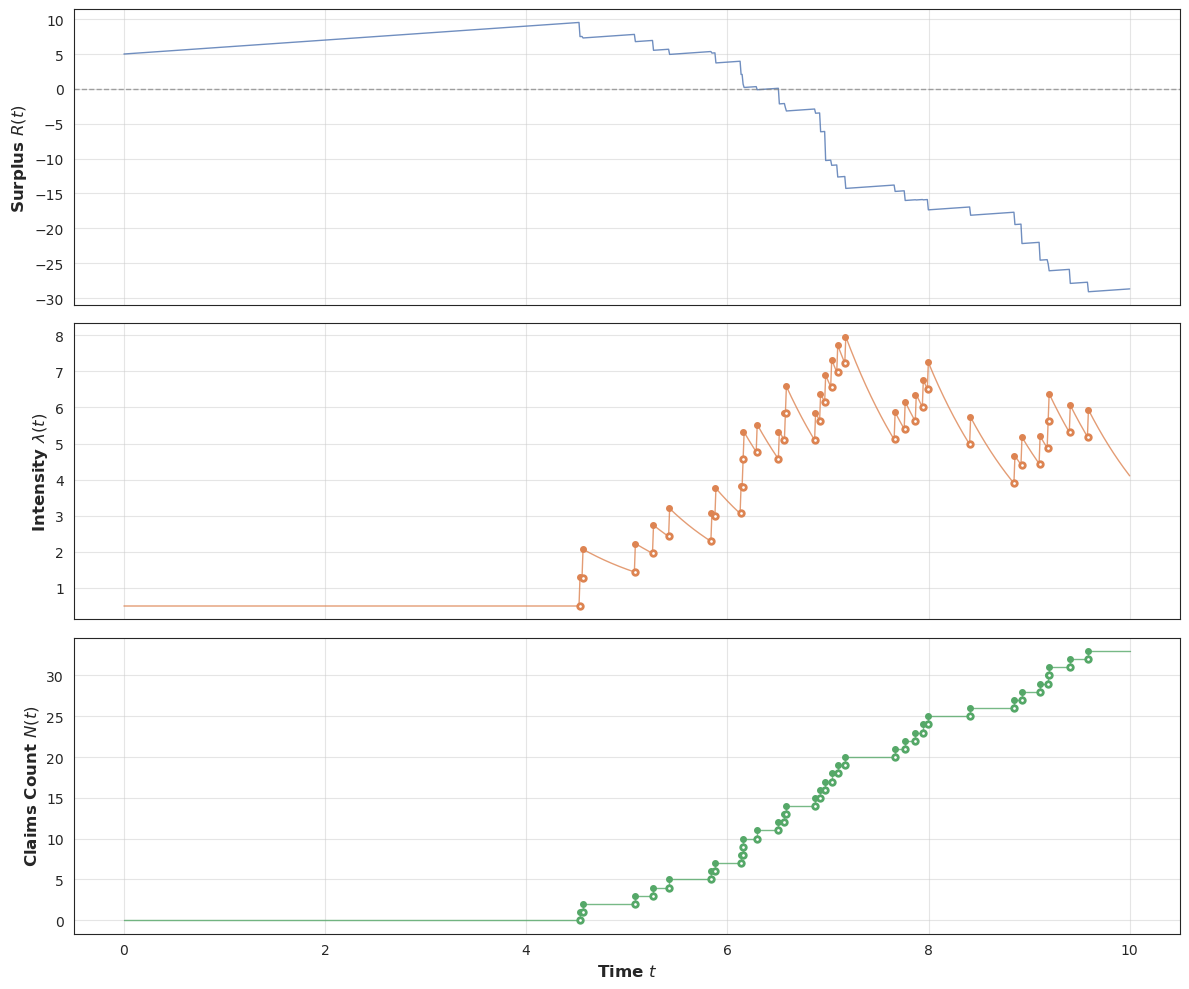

In [86]:
# Objectives: 
# - First verify the theoretical results (LLN, CLT, EVT, NPC, etc.)
# - Implement numerical methods to estimate ruin probabilities
# - Then compute the required loading to achieve a target ruin probability, use the theoretical bounds

# Simulations will use the thinning algorithm (allowed since lambda is bounded on [0, T]) for the Hawkes process
# and Monte Carlo for the risk process (estimate ruin probability by simulating many paths)

def sim_hawkes(mu, kernel, T, seed=None):
    # See Yuanda Chen (2016) for the algorithm
    rng = np.random.default_rng(seed=seed)
    times = []
    s, n = 0.0, 0

    def lam(s, times):
        return mu + np.sum([kernel(s - t) for t in times])
    
    while s < T:
        lam_bar = lam(s, times)
        w = rng.exponential(1/lam_bar)
        s += w
        D = rng.uniform()*lam_bar
        if D <= lam(s, times):
            n += 1
            times.append(s)
    if times[-1] <= T:
        return times
    return times[:-1]


class HawkesRiskProcess:
    def __init__(self, c, mu, kernel, claim_dist):
        self.c = c  # premium rate
        self.mu = mu  # baseline intensity
        self.kernel = kernel # excitation kernel
        self.claim_dist = claim_dist # function to generate claim sizes
    
    def simulate_process(self, T, u, seed=None):
        # Simulate the Hawkes-driven risk process up to time T with initial capital u
        arrivals = sim_hawkes(self.mu, self.kernel, T, seed=seed)
        n = len(arrivals)
        claims = self.claim_dist(n, seed=seed)
        return arrivals, claims

    def simulate_path(self, T, u, resolution=1000, seed=None):
        # Simulate a path of the Hawkes-driven risk process up to time T with initial capital u
        arrivals, claims = self.simulate_process(T, u, seed=seed)
        tx = np.linspace(0, T, resolution)
        base_wealth = u + self.c*tx

        for arrival, claim in zip(arrivals, claims):
            idx = np.searchsorted(tx, arrival)
            base_wealth[idx:] -= claim

        # Let us reconstruct the intensity along time
        lam = np.zeros_like(tx)
        for i, t in enumerate(tx):
            lam[i] = self.mu + np.sum([self.kernel(t - ta) for ta in arrivals if ta < t])
        return tx, arrivals, base_wealth, lam

    def plot_path(self, path, save_path=None):
        LINE_WIDTH = 1
        MARKER_SIZE = 4
        sns.set_style("white")
        colors = sns.color_palette("deep", 3)
        
        tx, arrivals, wealth, lams = path
        fig, axs = plt.subplots(3, 1, figsize=(12, 10), sharex=True)
        
        # Surplus plot
        axs[0].plot(tx, wealth, color=colors[0], linewidth=LINE_WIDTH, alpha=0.8)
        axs[0].axhline(y=0, color='gray', linestyle='--', alpha=0.7, linewidth=LINE_WIDTH)
        axs[0].set_ylabel(r'Surplus $R(t)$', fontsize=12, fontweight='bold')
        axs[0].grid(True, alpha=0.5)
        
        # Intensity plot
        axs[1].plot(tx, lams, color=colors[1], linewidth=LINE_WIDTH, alpha=0.8)
        for arrival in arrivals:
            idx = np.searchsorted(tx, arrival)
            if idx < len(tx):
                axs[1].plot(arrival, lams[idx], 'o', color=colors[1], markersize=MARKER_SIZE)
                axs[1].plot(arrival, lams[idx-1], 'o', color=colors[1], markersize=MARKER_SIZE,  
                           markerfacecolor='white', markeredgewidth=2)
        axs[1].set_ylabel(r'Intensity $\lambda(t)$', fontsize=12, fontweight='bold')
        axs[1].grid(True, alpha=0.5)

        # Count plot
        count_times = np.concatenate(([0], arrivals, [tx[-1]]))
        count_values = np.concatenate(([0], np.arange(1, len(arrivals)+1), [len(arrivals)]))
        axs[2].step(count_times, count_values, where='post', color=colors[2], linewidth=LINE_WIDTH, alpha=0.8)
        
        # Add markers at jump points
        for i, arrival in enumerate(arrivals):
            axs[2].plot(arrival, i, 'o', color=colors[2], markersize=MARKER_SIZE, 
                       markerfacecolor='white', markeredgewidth=2)
            axs[2].plot(arrival, i+1, 'o', color=colors[2], markersize=MARKER_SIZE)

        axs[2].set_xlabel(r'Time $t$', fontsize=12, fontweight='bold')
        axs[2].set_ylabel(r'Claims Count $N(t)$', fontsize=12, fontweight='bold')
        axs[2].grid(True, alpha=0.5)
        
        plt.tight_layout()
        if save_path:
            plt.savefig(save_path, dpi=300, bbox_inches='tight', facecolor='white')
        plt.show()

    def estimate_ruin_probability(self, u, T, num_simulations):
        # Estimate the ruin probability for initial capital u using Monte Carlo simulations
        ruin_count = 0
        for k in range(num_simulations):
            if k % 10 == 0:
                print(f"Simulation progress {k/num_simulations*100:.1f}%", end='\r')
            _, claims = self.simulate_process(T=T, u=u, seed=None)
            wealth = u + self.c * T - np.sum(claims)
            if np.any(wealth < 0):
                ruin_count += 1
        return ruin_count / num_simulations


def exp_kernel(t, alpha, beta):
    return alpha * np.exp(-beta * t) * (t >= 0)


# Testing paths
# Reminder: the NPC holds if c > mu * E[X] / (1 - ||kernel||_1) = c > mu * E[X] * beta / (beta - alpha)
mu = 0.5
alpha = 0.8
beta = 1.0
m = 1.0  # mean of the exponential claim size distribution
print(f"Net profit condition if c > {mu * m * beta / (beta - alpha):.1f}")

hawkes_risk = HawkesRiskProcess(
    c=1.0,
    mu=mu,
    kernel=lambda t: exp_kernel(t, alpha=alpha, beta=beta),
    claim_dist=lambda n, seed=None: np.random.default_rng(seed=seed).exponential(scale=m, size=n)
)
tx, arrivals, wealth, lams = hawkes_risk.simulate_path(T=10, u=5.0, seed=None)
hawkes_risk.plot_path((tx, arrivals, wealth, lams))

# TODO: study each parameter's influence on the simulation
# T=10, u=5.0, seed=11, c=1.0, mu=0.5, alpha=0.8, beta=1.0, m=1.0
# T=10, u=5.0, seed=17, c=1.0, mu=0.5, alpha=1.1, beta=1.0, m=1.0 # explosive case, kernel norm > 1

In [87]:
# Monte Carlo estimation of ruin probability
c, mu, alpha, beta, m = 3.0, 0.5, 0.8, 1.0, 1.0
hawkes_risk = HawkesRiskProcess(
    c=c,
    mu=mu,
    kernel=lambda t: exp_kernel(t, alpha=alpha, beta=beta),
    claim_dist=lambda n, seed=None: np.random.default_rng(seed=seed).exponential(scale=m, size=n)
)

# Parameters
u = 10.0
num_simulations = 100
T = 100
ruin_prob = hawkes_risk.estimate_ruin_probability(u=u, T=T, num_simulations=num_simulations)

# Results
print(f"Estimated ruin probability with initial capital {u}: {ruin_prob:.2f}")
print(f"NPC check: c = {hawkes_risk.c}, threshold = {mu * m * beta / (beta - alpha):.2f}")

Estimated ruin probability with initial capital 10.0: 0.20
NPC check: c = 3.0, threshold = 2.50


In [96]:
# Plot the ruin probability as a function of the premium rate c
# T_list = np.linspace(50, 250, 10)
T_list = [300]
c_list = np.arange(1.0, 6.5, 0.5)
p_ruin = [[] for _ in range(len(T_list))]
u = 10.0
num_simulations = 500
mu, alpha, beta, m = 0.5, 0.8, 1.0, 1.0

for c in c_list:
    hawkes_risk = HawkesRiskProcess(
        c=c,
        mu=mu,
        kernel=lambda t: exp_kernel(t, alpha=alpha, beta=beta),
        claim_dist=lambda n, seed=None: np.random.default_rng(seed=seed).exponential(scale=m, size=n)
    )
    for i, T in enumerate(T_list):
        print(f"Computing ruin probability for c={c:.1f}, T={T:.1f}...")
        ruin_prob = hawkes_risk.estimate_ruin_probability(u=u, T=T, num_simulations=num_simulations)
        p_ruin[i].append(ruin_prob)

Computing ruin probability for c=1.0, T=300.0...
Computing ruin probability for c=1.5, T=300.0...
Computing ruin probability for c=2.0, T=300.0...
Computing ruin probability for c=2.5, T=300.0...
Computing ruin probability for c=3.0, T=300.0...
Computing ruin probability for c=3.5, T=300.0...
Computing ruin probability for c=4.0, T=300.0...
Computing ruin probability for c=4.5, T=300.0...
Computing ruin probability for c=5.0, T=300.0...
Computing ruin probability for c=5.5, T=300.0...
Computing ruin probability for c=6.0, T=300.0...


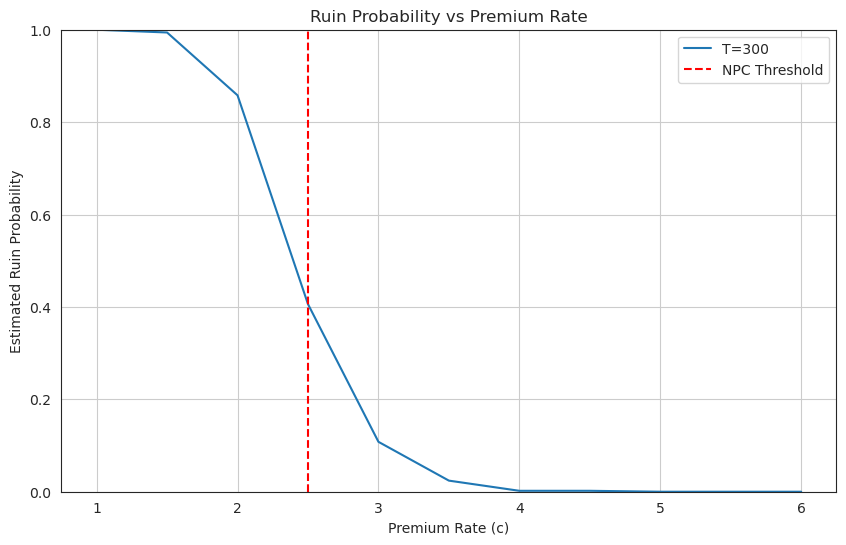

In [97]:
plt.figure(figsize=(10, 6))
for i, T in enumerate(T_list):
    plt.plot(c_list, p_ruin[i], label=f'T={T:.0f}')
plt.axvline(x=mu * m * beta / (beta - alpha), color='r', linestyle='--', label='NPC Threshold')
plt.title('Ruin Probability vs Premium Rate')
plt.xlabel('Premium Rate (c)')
plt.ylabel('Estimated Ruin Probability')
plt.ylim(0, 1)
plt.grid(True)
plt.legend()
plt.show()